## **Exercice semaine 14-Natural language processing (NLP)**
#### Objectifs: 
- Comprendre comment le langage naturel est traité pour être utiisé en ML
- Appliquer le traitement du langage naturel à la détection de sentiment dans les textes
##### Date limite de soumission: **Jeudi le 29 juin 2023 à 22 H.**

##### Base des données: disponible sur google drive au **format compressé** ici:
- [tweet-sentiment](https://drive.google.com/file/d/1LLoCcNMJnM7I2IGuLwReLTWVVCALaNyr/view?usp=sharing)
- url: https://drive.google.com/file/d/1LLoCcNMJnM7I2IGuLwReLTWVVCALaNyr/view?usp=sharing
  

#### **Description de la base**

Il s'agit de l'ensemble de données de sentiment provenant des tweets. Il contient 1 600 000 tweets extraits de twitter. Les tweets ont été annotés (0 = négatif, 4 = positif) et ils peuvent être utilisés pour détecter les sentiments .

**Contenu**

Il contient les 6 champs (colonnes) successifs suivants :

1. target : la polarité du tweet (0 = négatif, 2 = neutre, 4 = positif)

2. ids : L'identifiant du tweet ( 2087)

3. date : la date du tweet (samedi 16 mai 23:58:44 UTC 2009)

4. flag : La requête (lyx). S'il n'y a pas de requête, cette valeur est NO_QUERY.

5. user : l'utilisateur qui a tweeté (robotickilldozr)

6. text : le texte du tweet (Lyx is cool)

In [59]:
#!pip install wordcloud

In [1]:
# Importer les packages necessaires ici
import pandas as pd

# packages for text processing
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from keras.preprocessing.text import text_to_word_sequence
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")
import re

from sklearn.feature_extraction.text import TfidfVectorizer
# Splitting and training
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DDD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DDD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DDD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
# Importer les modules nécessaires pour le calcul des métriques
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.metrics import specificity_score


**Task 1:** Write a function call `"wrangle"` to import zip csv file(with comma separated values) dataset. Your function should have one argument and you should make sure that you correctly labelled columns. Use doc string in the proposed function below to write the function.
- [Define function in python](https://cs.stanford.edu/people/nick/py/python-function.html)
- [Read CSV file using pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [3]:
# Fonction d'importation de la 
def wrangle (url):
    """
    1. Argument unique: l'adresse du fichier nommé "url"
    2. Encodage: latin ou ISO-8859-1
    3. Importer directement la base des données au format compressé dans votre notebook
    4. Les variables sont dans l'ordre suivant: "target", "ids", "date", "flag", "user", "text"
    5. Recorder les modalités de la variable "target" en (0 = 0, 4 = 1, 0 étant le sentiment négatif et 1 le positif)
    6. Retourner la base des données ne contenant que les colonnes "target" et "text"
    
    """
    columns = ["target", "ids", "date", "flag", "user", "text"]
    df = pd.read_csv(url, encoding = "latin", names = columns)
    df["target"] = df["target"].replace({4: 1})
    df = df[["target", "text"]]
    
    return df

In [4]:
url = "tweet_sentiment.zip"
df = wrangle(url)
df.shape

(1600000, 2)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [52]:
df["target"].unique()

array([0, 1], dtype=int64)

In [53]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


**Task 2:** Calculate the frequency of each modality of `"target"` . What is your conclusion?

In [56]:
df["target"].value_counts(normalize = True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64

**Task 3:** Expliquer et appliquer `"la lemmatisation"` à la phrase suivante: `"les étudiants de IFPERA préferent rédiger leurs mémoires durant les périodes calmes"`
- [Lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/)

In [ ]:
# Explain lemmatization


In [ ]:
# Apply lemmatization to a sentence



**Task 3:** Ecrire une fonction  `"word_cloud_generator"` pour Générer et afficher les mots contenus dans la colonne `text` à l'index 0 à l'aide du générateur `"wordcloud"` 
- [wordcloud](http://amueller.github.io/word_cloud/auto_examples/index.html)
- [wordcloud en python](https://datascientest.com/wordcloud-python)
  

In [5]:
def word_cloud_generator(text):
    wordcloud = WordCloud(background_color = 'white').generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

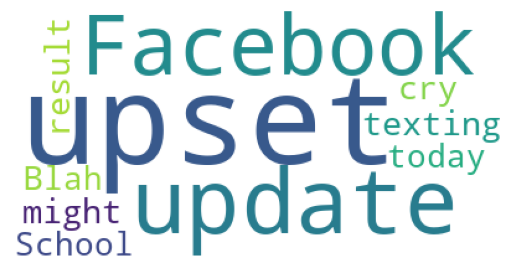

In [8]:
word_cloud_generator(df["text"][1])

**Task 4:** Re-ecrire la fonction  `"word_cloud_genrator"` pour Générer et afficher les mots contenus dans toute la colonne `text`  à l'aide du générateur `"wordcloud"` . Vous pourriez utliser la méthode `join` pour aggreger les textes.
- [wordcloud](http://amueller.github.io/word_cloud/auto_examples/index.html)
- [wordcloud en python](https://datascientest.com/wordcloud-python)

In [14]:
def word_cloud_generator(text):
    all_text = " ".join(text)
    wordcloud = WordCloud(background_color = 'white').generate(all_text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

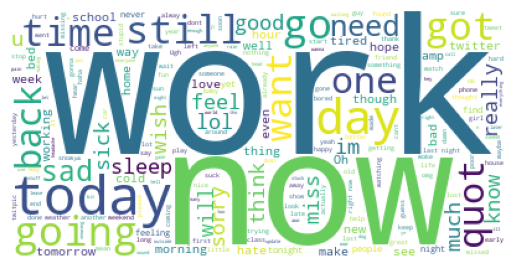

In [15]:
# Appliquer word_cloud_generator aux 10.000 premiers tweets 
word_cloud_generator(df["text"][:10_000])

**Task 5:** Générer  les `"wordcloud"` des 10.000 premiers sentiments `négatifs` et des 10.000 premiers sentiments `positfs`
- [wordcloud](http://amueller.github.io/word_cloud/auto_examples/index.html)
- [wordcloud en python](https://datascientest.com/wordcloud-python)

wordcloud sentiments negatifs


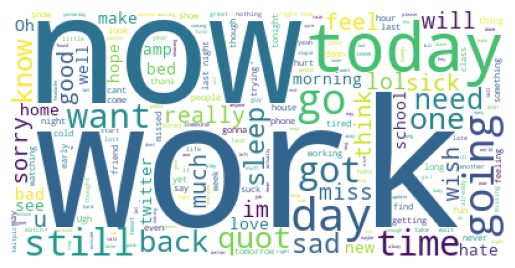

In [18]:
# wordcloud des sentiments négatifs
print("wordcloud sentiments negatifs")
word_cloud_generator(df[df["target"]==0]["text"][:10_000]) 

wordcloud sentiment positifs


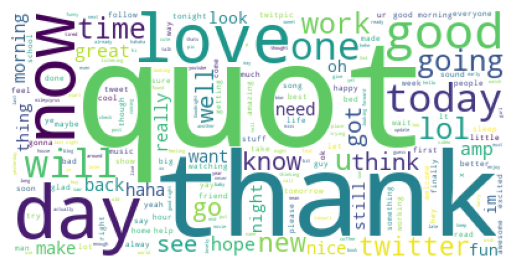

In [19]:
# wordclud des sentiments positifs
print("wordcloud sentiment positifs")
word_cloud_generator(df[df["target"]==1]["text"][:10_000])

##### **Quel est votre constat?**

In [ ]:
# Votre constat


**Task 6:** We will now tokenize our `texts`. What is `tokenization`? Apply this technique to the first tweet.
- [Tokenization](https://www.kaggle.com/code/satishgunjal/tokenization-in-nlp)
- [NLTK](https://www.nltk.org/)

In [80]:
#!pip install --user -U nltk

In [ ]:
# define tokenization



In [29]:
# Apply to the first tweet
first_tweet = df["text"][0]
print("non tokenize sentence:", first_tweet)

non tokenize sentence: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [36]:
# Apply to the first tweet using NLTK
tokens_words = word_tokenize(df["text"][0].lower())
print("word tokenize of sentence:", tokens_words)

word tokenize of sentence: ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'awww', ',', 'that', "'s", 'a', 'bummer', '.', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', '.', ';', 'd']


In [32]:
# Apply to the first tweet using keras
tokens_words_keras = text_to_word_sequence(df["text"][0], lower = True)
print("word tokenize of sentence:", tokens_words_keras)

word tokenize of sentence: ['switchfoot', 'http', 'twitpic', 'com', '2y1zl', 'awww', "that's", 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']


**Task 7:** We will now remove what it is called `"stopwords"`. These stopwords are not important for NLP and depend on language use. We are using tweets in English. State some English stopwords.
- [stopwords](https://pythonspot.com/nltk-stop-words/)
- [NLTK stop words](https://www.nltk.org/)

In [28]:
english_stopwords = set(stopwords.words('english'))
print(english_stopwords)

{'has', 'mustn', 'between', 'what', 'themselves', 'being', 't', 'nor', "mightn't", 'than', 'until', 'doesn', 'a', 'mightn', 'above', "you'd", 'himself', 'couldn', "you'll", 'during', 'about', 'yourself', 'are', 'under', 'll', 'because', 'by', 'from', 'that', 'had', 'wouldn', "wouldn't", 'out', 'his', 'if', 'same', "haven't", "she's", 'its', "didn't", "weren't", 'each', 'he', 'yours', "you're", 'those', 'once', 'just', 'doing', 'does', 'before', 'after', 'do', 'who', 'will', 'isn', 'of', 'when', 'the', "aren't", 'your', 'don', 'herself', 'these', 'there', 'why', 'me', 'won', 'their', 'against', 'myself', 'so', 'you', 'with', 'through', 'did', 'my', 'again', 'our', 've', 'how', 'whom', 'am', 'here', "hasn't", 'i', 'should', "needn't", 'ourselves', 'other', 'hadn', 'o', 'wasn', 'm', 'weren', 'into', "isn't", "shouldn't", 'd', 'have', 'we', "won't", 'such', 'then', 'where', 'very', 'now', 'it', 'yourselves', 'up', 'shan', 'over', "wasn't", 'y', 'aren', 'off', 'itself', 'no', 'too', 'hasn',

In [33]:
# Using NLTK
wordsFiltered = []
english_stopwords = set(stopwords.words('english'))
for w in tokens_words:
    if w not in english_stopwords:
        wordsFiltered.append(w)

print(wordsFiltered)

['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'Awww', ',', "'s", 'bummer', '.', 'You', 'shoulda', 'got', 'David', 'Carr', 'Third', 'Day', '.', ';', 'D']


In [34]:
# Using Keras tokenization
wordsFiltered = []
english_stopwords = set(stopwords.words('english'))
for w in tokens_words_keras:
    if w not in english_stopwords:
        wordsFiltered.append(w)

print(wordsFiltered)

['switchfoot', 'http', 'twitpic', 'com', '2y1zl', 'awww', "that's", 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']


**Task 8:** We need now to write a function called `"clean_text"`to `tokenize` and process all text features in our dataset. We should remove: `"stopwords"`, `"special characters"`, `"punctuations"` These elements are not important for NLP. Your function should have one argument. You should use the doc strings indicated in the following incomplete function. 
- [stopwords](https://pythonspot.com/nltk-stop-words/)
- [NLTK stop words](https://www.nltk.org/)

In [23]:
# Write your function here
def clean_text(text):
    """
    1. One argument: text 
    2. Tokenize the argment
    2. Remove special characters and punctuations( you can use python "re" module with NLTK , or keras)
    3. Transform all letters in lower case (minuscules)
    4. Delete all stopwords(mots vides)
    5. Apply lemmatization 
    5. join all obtained tokens into a single string ( you can use .join())
    6. return cleaned text

    """
    # tokenize and remove special characters/punctations and use lower case
    tokens = text_to_word_sequence(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words ]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Puting words together in a same string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [63]:
# Write your function here
def clean_text_NLTK(text):
    """
    1. One argument: text 
    2. Tokenize the argment
    2. Remove special characters and punctuations( you can use python "re" module with NLTK , or keras)
    3. Transform all letters in lower case (minuscules)
    4. Delete all stopwords(mots vides)
    5. Apply lemmatization 
    5. join all obtained tokens into a single string ( you can use .join())
    6. return cleaned text

    """
    # Remove special characters
    process_text = re.sub(r"[/[^\w\s]/gi]", "", text)
    process_text = re.sub(r"[@#$*&87]", "", process_text)
    # set to lower case
    process_text = process_text.lower()
    # tokenize to words
    tokens = word_tokenize(process_text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words ]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Puting words together in a same string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [80]:
tokens = text_to_word_sequence(df["text"][0])
print(tokens)

['switchfoot', 'http', 'twitpic', 'com', '2y1zl', 'awww', "that's", 'a', 'bummer', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', 'd']


In [81]:
clean_text(df["text"][1])

"upset can't update facebook texting might cry result school today also blah"

In [82]:
clean_text_NLTK(df["text"][1])

"upset ca n't update facebook texting ... might cry result school today also . blah !"

**Task 9:** 
1) Randomly selected 10.000 negative tweets (df_negative) and 10.000 positive tweets (df_positive) and
   put these two subsets in one dataframe called `"df_subset"`. Set  a random state of generator at 42.
2) Create a new column named `"clean_tweet"` in your `"df_subset"`. This column should be the cleaned column by applying clean_text function we have created. You can use `apply` function  with a function we have just created. Don't forgot to drop former index/reset index after concatenation 
- [Apply function in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)


In [25]:
# Random slection and concatenation here:
# negative sample
df_negative = df[df["target"]==0].sample(n = 10_000, random_state = 42)
# Positive sample
df_positive = df[df["target"]==1].sample(n = 10_000, random_state = 42)
# Concatenation to have df_work
df_subset = pd.concat ([df_negative, df_positive], axis = 0).reset_index(drop= True)
print("df_work shape:",df_subset.shape)

df_work shape: (20000, 2)


In [65]:
df_subset.head()

,target,text
0,0,@xnausikaax oh no! where did u order from? tha...
1,0,A great hard training weekend is over. a coup...
2,0,"Right, off to work Only 5 hours to go until I..."
3,0,I am craving for japanese food
4,0,Jean Michel Jarre concert tomorrow gotta work...


In [26]:
# Create df_work with clean_tweet column here
df_subset["clean_tweet"] = df_subset["text"].apply(clean_text)
df_subset.head()

,target,text,clean_tweet
0,0,@xnausikaax oh no! where did u order from? tha...,xnausikaax oh u order that's horrible
1,0,A great hard training weekend is over. a coup...,great hard training weekend couple day rest le...
2,0,"Right, off to work Only 5 hours to go until I...",right work 5 hour go i'm free xd
3,0,I am craving for japanese food,craving japanese food
4,0,Jean Michel Jarre concert tomorrow gotta work...,jean michel jarre concert tomorrow gotta work ...


wordcloud negative sentiment


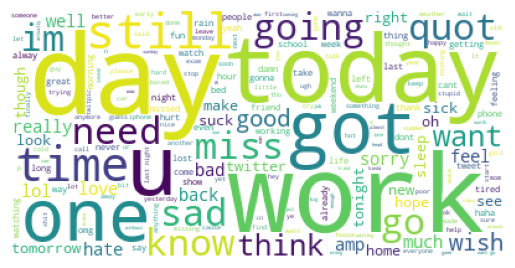

In [27]:
# Print wordcloud for negative sentiment in df_subset
print("wordcloud negative sentiment")
word_cloud_generator(df_subset[df_subset["target"]==0]["clean_tweet"])

wordcloud positive sentiment


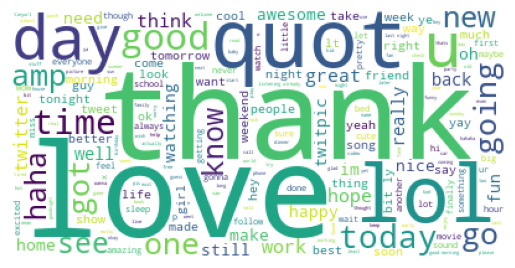

In [31]:
# Print wordcloud for positive sentiment in df_subset
print("wordcloud positive sentiment")
word_cloud_generator(df_subset[df_subset["target"]==1]["clean_tweet"])

**Task 10:** We have cleaned text data. We should move forward now by transforming words in numeric data in order to use these data in machine learning models. To solve this issue we will use `TF_IDF (Term frequency-Inverse Document Frequency)`. Use SKlearn features extraction module for this task. You should construct a function (`features_extraction`) with following actions:
1) Selected features or X : this is a Series of clean_tweet with a shape (20.000, 0)
2) Selected target or y: this is target column with a shape of (20.000,)
3) Apply TfidfVectorizer transformation to X
4) Transform features to sparses matrix using for example to_array method
5) Print dimension of sparses matrix of X
6) Return transform X and, y

- [Text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
- [Text feature extraction applying TfidfVectorizer ](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [32]:
def features_extraction(dataframe):
    # Selected features X and target y
    X = dataframe["clean_tweet"]
    y = dataframe["target"]
    # Vectorize features
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(X)
    # Transform features to sparse matrix
    X = X.toarray()
    print("Features or X shape:", X.shape)
    return  X, y

In [33]:
X, y = features_extraction(dataframe = df_subset)

Features or X shape: (20000, 28835)


In [23]:
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1995    1
 1996    1
 1997    1
 1998    1
 1999    1
 Name: target, Length: 2000, dtype: int64)

**Task 11:** It is time for modelisation. Use SKlearn to split df_subset for traning and test set. Use random_state of 42 and stratify split on y. You should keep 20% of data for test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

In [69]:
X_train, y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 1478    1
 1488    1
 499     0
 605     0
 1511    1
        ..
 1240    1
 452     0
 1248    1
 1303    1
 1529    1
 Name: target, Length: 1600, dtype: int64)

In [70]:
y_train.value_counts()

target
1    800
0    800
Name: count, dtype: int64

**Task 12:** Build and evaluate  one ot two classic ML algorithm to predict positive tweet. 

In [79]:
logistic = LogisticRegression(random_state=42, max_iter= 1000)
rf = RandomForestClassifier (random_state=42)

In [80]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [85]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# learning curve
N, train_score, val_score = learning_curve(logistic, X_train, y_train,  scoring='accuracy',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

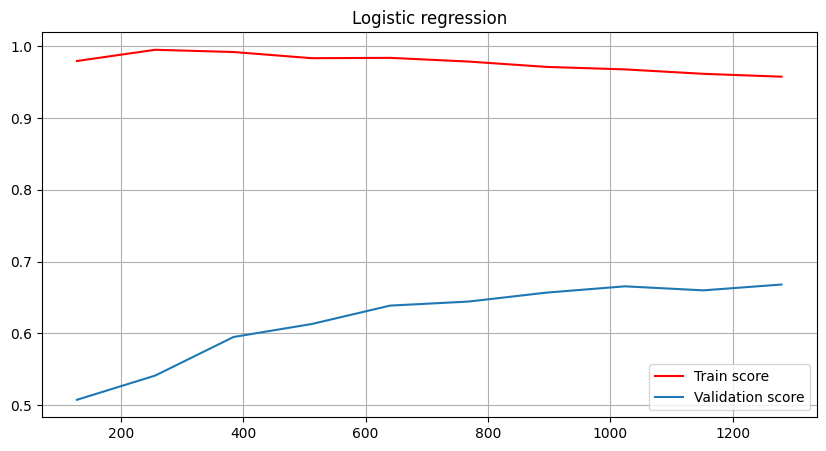

In [84]:

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(figsize=(10, 5))

# For Logistic regression
axis.plot(N, train_score.mean(axis=1), color = "red")    
axis.plot(N, val_score.mean(axis=1))
axis.set_title("Logistic regression")
axis.legend(['Train score', 'Validation score'])
axis.grid(visible = None)

In [31]:

N_rf, train_score_rf, val_score_rf = learning_curve(rf, X_train, y_train,  scoring='accuracy',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

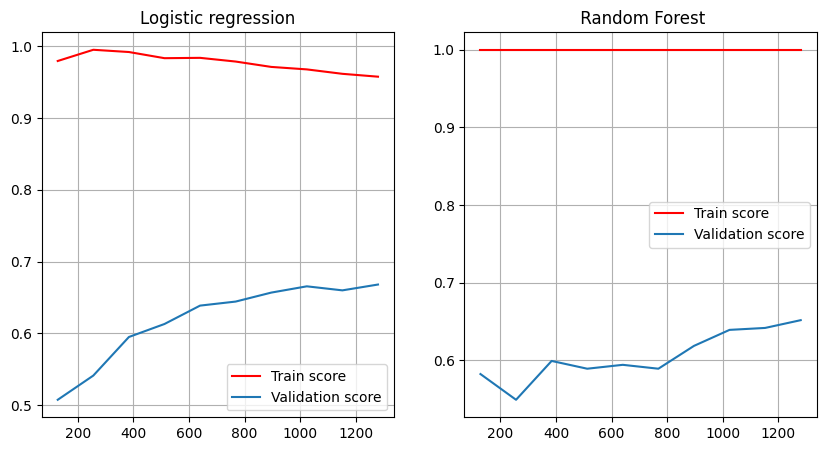

In [86]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

# For Logistic regression
axis[0].plot(N, train_score.mean(axis=1), color = "red")    
axis[0].plot(N, val_score.mean(axis=1))
axis[0].set_title("Logistic regression")
axis[0].legend(['Train score', 'Validation score'])
axis[0].grid(visible = None)
# For  random Forest
axis[1].plot(N_rf, train_score_rf.mean(axis=1), color = "red")
axis[1].plot(N_rf, val_score_rf.mean(axis=1))
axis[1].set_title(" Random Forest")
axis[1].legend(['Train score', 'Validation score'])
axis[1].grid(visible = None)

In [33]:
def evaluation(model, X_test=X_test):
    # Prédictions sur les données du test set
    ypred = model.predict(X_test)
    # Calcul de l'AUC et spécificité
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:, 1]
    model_auc = roc_auc_score(y_test, model_probs)
    spe = specificity_score(y_test, ypred, average=None)
    # Matrice de confuson et scores associés dont F1
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("SPECIFICITY")
    print(spe)
    print("AUROC")
    print(model_auc)

In [34]:
evaluation(model= logistic, X_test=X_test)

CONFUSION MATRIX
[[135  64]
 [ 63 138]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       199
           1       0.68      0.69      0.68       201

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400

SPECIFICITY
[0.68656716 0.67839196]
AUROC
0.748268706717668


In [49]:
text_1 = "I was not very happy in the past few days "
text_1 = pd.DataFrame([text_1], columns = ["text"])
text_1_clean = text_1["text"].apply(clean_text)
text_1_clean

0    happy past day
Name: text, dtype: object

In [53]:
text_1["clean_tweet"] = text_1["text"].apply(clean_text)
text_1.head()

,text,clean_tweet
0,I was not very happy in the past few days,happy past day


In [ ]:
X_test_1 = pd.concat([X_test, text_1], axis= 0).reset_index(drop= True)
X_test_1

In [54]:
def features_extraction_unseen(dataframe):
    # Selected features X
    X = dataframe["clean_tweet"]
    # Vectorize features
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(X)
    # Transform features to sparse matrix
    X = X.toarray()
    print("Features or X shape:", X.shape)
    return  X

In [57]:
unseen = features_extraction_unseen(dataframe=text_1)

Features or X shape: (1, 3)


In [58]:
unseen

array([[0.57735027, 0.57735027, 0.57735027]])

In [ ]:
logistic.predict(features_extraction_unseen(text=text_1_clean))

**Task 13:** Build and evaluate  an adapted recurrent neural network to predict tweets sentiment in a subset of dataset. 